# Elapsic ddG

June 19nd, 2022

In [1]:
import pandas as pd
from utils import(
    save_prediction_data,
    BaselineDeltaDeltaGClassifier,
)

TRAIN_DATA_PATH = "../../common/train_data_with_PDB_features.csv"

In [2]:
train_data = pd.read_csv(
    TRAIN_DATA_PATH, usecols=[
        "Mutation_Effect_Label",
        "UniProt_ID",
        "Mutation",
        "Interactor_UniProt_ID",
        "Final_ddG",
        "Template_cath_id_pdb",
        "Chain_id",
    ]
)

In [3]:
train_data

,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,Final_ddG,Template_cath_id_pdb,Chain_id
0,1,Q9BPZ3,F118A,P11940,1.219700,1jgn,B
1,1,P01116,Y40C,P50749,2.076950,3ddc,A
2,1,Q96QK1,F534D,Q9UBQ0,2.695710,2r17,C
3,1,Q96QK1,F534D,Q9UBQ0-2,2.695710,2r17,C
4,1,O43521-3,G66A,Q07812,0.683334,3fdl,B
...,...,...,...,...,...,...,...
735,1,P84243,Q94A,Q9UER7-3,-0.387860,4hga,B
736,1,Q96QK1,L589D,Q9UBQ0,2.178790,2r17,C
737,1,Q96QK1,L589D,Q9UBQ0-2,2.178790,2r17,C
738,1,P23297,F72L,P25815,1.742750,2y5i,A


In [4]:
train_data["Elaspic_ddG_Fixed_Prediction"] = BaselineDeltaDeltaGClassifier().predict(train_data[["Final_ddG"]])

In [5]:
train_data

,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,Final_ddG,Template_cath_id_pdb,Chain_id,Elaspic_ddG_Fixed_Prediction
0,1,Q9BPZ3,F118A,P11940,1.219700,1jgn,B,1
1,1,P01116,Y40C,P50749,2.076950,3ddc,A,1
2,1,Q96QK1,F534D,Q9UBQ0,2.695710,2r17,C,1
3,1,Q96QK1,F534D,Q9UBQ0-2,2.695710,2r17,C,1
4,1,O43521-3,G66A,Q07812,0.683334,3fdl,B,1
...,...,...,...,...,...,...,...,...
735,1,P84243,Q94A,Q9UER7-3,-0.387860,4hga,B,0
736,1,Q96QK1,L589D,Q9UBQ0,2.178790,2r17,C,1
737,1,Q96QK1,L589D,Q9UBQ0-2,2.178790,2r17,C,1
738,1,P23297,F72L,P25815,1.742750,2y5i,A,1


1    663
0     77
Name: Elaspic_ddG_Fixed_Prediction, dtype: int64


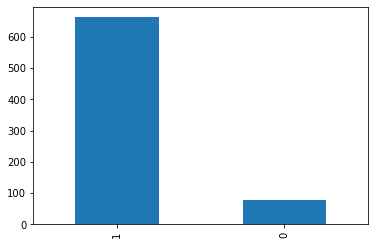

In [6]:
print(train_data["Elaspic_ddG_Fixed_Prediction"].value_counts())
train_data["Elaspic_ddG_Fixed_Prediction"].value_counts().plot(kind="bar");

In [7]:
save_prediction_data(
    benchmark_dir=".",
    prediction_file_name="ELASPIC_ddG_Fixed_Predictions",
    prediction_data=train_data,
)

Prediction data `.\ELASPIC_ddG_Fixed_Predictions_2022-06-19.csv`is exported.
